## Creating Widgets that Navigate through NBA Statistics
By Ashley Radford

Downloading and using nba data from stats.nba.com to create interactive widgets that present plots analyzing the players' shots. This data is used to demonstrate data transformation and visualization via the split-apply-combine approach.

### Data download
The `get_nba_data()` function from the helper_basketball module will be used to download multiple nba datasets that will be needed for the drop down selection widgets. These datasets incude the teams data, player data, and shots data. End visualizations will require specific selected data grabbed from the shots data, which in and of itself will require specific paramaters. Thus, after retrieving our three necessary datasets using the `get_nba_data()` function, we will create another function with three parameters (team id, name id, and game date id). This function will return the necessary parameters for a specifc team, player, and game date for the `get_nba_data()` function used to download shots data. This function, `choose_player_game()`, is tested along with `get_nba_data()` below.

In [1]:
# necessary importations
import numpy as np
import pandas as pd
from ipywidgets import Dropdown, Button
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from IPython.display import clear_output
import helper_basketball as h

In [2]:
# lets see what current_year and latest_season we have chocen in the helper_basketball module
print('current year is ' + str(h.current_year))
print('latest season is ' + str(h.latest_season))

current year is 2017
latest season is 2016-17


In [3]:
# getting teams data (refer to function comments in helper_basketball.py for appropriate parameters)
teams_params = {'LeagueID':'00'}
teams = h.get_nba_data('commonTeamYears', teams_params)
teams.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION
0,00,1610612737,1949,2018,ATL
1,00,1610612738,1946,2018,BOS
2,00,1610612739,1970,2018,CLE
3,00,1610612740,2002,2018,NOP
4,00,1610612741,1966,2018,CHI


In [4]:
# link that data is pulled from
# http://stats.nba.com/stats/commonTeamYears?LeagueID=00

In [5]:
# getting player data
# can put whatever in season, not only current season
players_params = {'LeagueID':'00', 'Season': h.latest_season, 'IsOnlyCurrentSeason':'0'}
players = h.get_nba_data('commonallplayers', players_params)
players.head()

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,GAMES_PLAYED_FLAG
0,76001,"Abdelnaby, Alaa",Alaa Abdelnaby,0,1990,1994,HISTADD_alaa_abdelnaby,0,,,,,Y
1,76002,"Abdul-Aziz, Zaid",Zaid Abdul-Aziz,0,1968,1977,HISTADD_zaid_abdul-aziz,0,,,,,Y
2,76003,"Abdul-Jabbar, Kareem",Kareem Abdul-Jabbar,0,1969,1988,HISTADD_kareem_abdul-jabbar,0,,,,,Y
3,51,"Abdul-Rauf, Mahmoud",Mahmoud Abdul-Rauf,0,1990,2000,mahmoud_abdul-rauf,0,,,,,Y
4,1505,"Abdul-Wahad, Tariq",Tariq Abdul-Wahad,0,1997,2003,tariq_abdul-wahad,0,,,,,Y


In [6]:
# getting shots data
shots_params = {'PlayerID':'0',
                'PlayerPosition':'',
                'Season': h.latest_season,
                'ContextMeasure':'FGA',
                'DateFrom':'',
                'DateTo':'',
                'GameID':'',
                'GameSegment':'',
                'LastNGames':'0',
                'LeagueID':'00',
                'Location':'',
                'Month':'0',
                'OpponentTeamID':'0',
                'Outcome':'',
                'Period':'0',
                'Position':'',
                'RookieYear':'',
                'SeasonSegment':'',
                'SeasonType':'Regular Season',
                'TeamID':'0',
                'VsConference':'',
                'VsDivision':''}

shotdata = h.get_nba_data('shotchartdetail', shots_params)
shotdata.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021600001,2,201565,Derrick Rose,1610612752,New York Knicks,1,11,40,...,Center(C),Less Than 8 ft.,0,4,8,1,1,20161025,CLE,NYK
1,Shot Chart Detail,0021600001,3,201567,Kevin Love,1610612739,Cleveland Cavaliers,1,11,26,...,Center(C),Less Than 8 ft.,3,-11,36,1,0,20161025,CLE,NYK
2,Shot Chart Detail,0021600001,5,2546,Carmelo Anthony,1610612752,New York Knicks,1,11,16,...,Right Side Center(RC),16-24 ft.,19,148,129,1,0,20161025,CLE,NYK
3,Shot Chart Detail,0021600001,7,204001,Kristaps Porzingis,1610612752,New York Knicks,1,11,15,...,Center(C),Less Than 8 ft.,2,24,-1,1,1,20161025,CLE,NYK
4,Shot Chart Detail,0021600001,8,2544,LeBron James,1610612739,Cleveland Cavaliers,1,10,59,...,Left Side(L),8-16 ft.,11,-79,80,1,1,20161025,CLE,NYK


In [7]:
# function using the widgets selections
def choose_player_game(teamid, playerid='0', gameid=None):
    if teamid == None: teamid = '0'
    if playerid == None: playerid = '0'
    if gameid == None: gameid = ''
    chosen_params = {'PlayerID':playerid,
                     'PlayerPosition':'',
                     'Season': h.latest_season,
                     'ContextMeasure':'FGA',
                     'DateFrom':'',
                     'DateTo':'',
                     'GameID':gameid,
                     'GameSegment':'',
                     'LastNGames':'0',
                     'LeagueID':'00',
                     'Location':'',
                     'Month':'0',
                     'OpponentTeamID':'0',
                     'Outcome':'',
                     'Period':'0',
                     'Position':'',
                     'RookieYear':'',
                     'SeasonSegment':'',
                     'SeasonType':'Regular Season',
                     'TeamID':teamid,
                     'VsConference':'',
                     'VsDivision':''}
    return chosen_params

# test function for parameters Golden State Warriors, Stephen Curry, and 10/25/2016 game
# only works when h.current_year is 2017 and h.latest_season is 2016-17
player_game = h.get_nba_data('shotchartdetail', choose_player_game('1610612744', '201939', '0021600003'))
player_game.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021600003,19,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,2,...,Right Side Center(RC),24+ ft.,28,130,257,1,0,20161025,GSW,SAS
1,Shot Chart Detail,0021600003,28,201939,Stephen Curry,1610612744,Golden State Warriors,1,8,6,...,Right Side Center(RC),24+ ft.,25,189,174,1,1,20161025,GSW,SAS
2,Shot Chart Detail,0021600003,88,201939,Stephen Curry,1610612744,Golden State Warriors,1,2,23,...,Right Side Center(RC),24+ ft.,27,159,229,1,0,20161025,GSW,SAS
3,Shot Chart Detail,0021600003,91,201939,Stephen Curry,1610612744,Golden State Warriors,1,2,1,...,Right Side Center(RC),16-24 ft.,21,163,141,1,0,20161025,GSW,SAS
4,Shot Chart Detail,0021600003,184,201939,Stephen Curry,1610612744,Golden State Warriors,2,6,47,...,Center(C),24+ ft.,26,-9,267,1,1,20161025,GSW,SAS


### Subsetting and cleaning data for widget creation
Later we will be creating the 3 widgets that will be used to pull data with the `chose_player_game()` and `get_nba_data()` functions. However, we first want to set up the data types and make sure to subset only the current teams and active players (players who played at least one game in the selected season) for our drop down selections. This is because we plan to have the following widgets: first one to select the team, then one to pick a player from the selected team, and then a third to pick a specific game that that player took shots in. We will do a check of the data and then follow with some more data clean up.

In [8]:
# setting up series types
teams.ABBREVIATION = teams.ABBREVIATION.astype('category')
teams.TEAM_ID      = teams.TEAM_ID.astype('category')
teams.MIN_YEAR     = teams.MIN_YEAR.astype('int')
teams.MAX_YEAR     = teams.MAX_YEAR.astype('int')

# taking current teams
teams = teams[(teams.MIN_YEAR <= (h.current_year-1)) & (teams.MAX_YEAR >= h.current_year)]
# taking current and active players
players = players[players.TEAM_ID.isin(teams.TEAM_ID) & players.PERSON_ID.isin(shotdata.PLAYER_ID)]
# taking active players shotdata
shotdata = shotdata[shotdata.PLAYER_ID.isin(players.PERSON_ID)]

In [9]:
# checking teams data
teams.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION
0,00,1610612737,1949,2018,ATL
1,00,1610612738,1946,2018,BOS
2,00,1610612739,1970,2018,CLE
3,00,1610612740,2002,2018,NOP
4,00,1610612741,1966,2018,CHI


In [10]:
# checking players data
players.head()

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,GAMES_PLAYED_FLAG
9,203518,"Abrines, Alex",Alex Abrines,1,2016,2018,alex_abrines,1610612760,Oklahoma City,Thunder,OKC,thunder,Y
14,203112,"Acy, Quincy",Quincy Acy,1,2012,2017,quincy_acy,1610612751,Brooklyn,Nets,BKN,nets,Y
21,203500,"Adams, Steven",Steven Adams,1,2013,2018,steven_adams,1610612760,Oklahoma City,Thunder,OKC,thunder,Y
26,201167,"Afflalo, Arron",Arron Afflalo,1,2007,2017,arron_afflalo,1610612758,Sacramento,Kings,SAC,kings,Y
31,201582,"Ajinca, Alexis",Alexis Ajinca,1,2008,2017,alexis_ajinca,1610612740,New Orleans,Pelicans,NOP,pelicans,Y


In [11]:
# checking shots 
shotdata.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021600001,2,201565,Derrick Rose,1610612752,New York Knicks,1,11,40,...,Center(C),Less Than 8 ft.,0,4,8,1,1,20161025,CLE,NYK
1,Shot Chart Detail,0021600001,3,201567,Kevin Love,1610612739,Cleveland Cavaliers,1,11,26,...,Center(C),Less Than 8 ft.,3,-11,36,1,0,20161025,CLE,NYK
2,Shot Chart Detail,0021600001,5,2546,Carmelo Anthony,1610612752,New York Knicks,1,11,16,...,Right Side Center(RC),16-24 ft.,19,148,129,1,0,20161025,CLE,NYK
3,Shot Chart Detail,0021600001,7,204001,Kristaps Porzingis,1610612752,New York Knicks,1,11,15,...,Center(C),Less Than 8 ft.,2,24,-1,1,1,20161025,CLE,NYK
4,Shot Chart Detail,0021600001,8,2544,LeBron James,1610612739,Cleveland Cavaliers,1,10,59,...,Left Side(L),8-16 ft.,11,-79,80,1,1,20161025,CLE,NYK


### Adding in some columns for later convenience
Eventually, we are going to want to take the name of a team from the teams dataframe for convenience. Thus, we will create a `TEAM_NAME` column in the 'teams' dataframe. We will do this by using the merging in the `TEAM_NAME` column from the `players` dataframe.

In [12]:
# creating TEAM_NAME column on teams by merging data from players
team_names = players[['TEAM_ABBREVIATION', 'TEAM_NAME']].copy().drop_duplicates()
teams = pd.merge(teams, team_names, left_on='ABBREVIATION', right_on='TEAM_ABBREVIATION')

# getting rid of TEAM_ABBREVIATION column
teams = teams.drop(['TEAM_ABBREVIATION'], axis=1) # only returns values, so needs to be reassigned
teams.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,TEAM_NAME
0,00,1610612737,1949,2018,ATL,Hawks
1,00,1610612738,1946,2018,BOS,Celtics
2,00,1610612739,1970,2018,CLE,Cavaliers
3,00,1610612740,2002,2018,NOP,Pelicans
4,00,1610612741,1966,2018,CHI,Bulls


### Creating a useful function for current and later use
In the following code, the function `readable_data()` is created to allow for proper formating of the game dates that are in `shotdata.`

In [13]:
# creating readable dates function
def readable_date(date):
    mm = date[4:6]
    dd = date[6:]
    yyyy = date[:4]
    readable = mm+'/'+dd+'/'+yyyy
    return readable

# changing the GAME_DATE column in shotdata
temp = []
for date in shotdata.GAME_DATE:
    read_date = readable_date(date)
    temp += [read_date]

shotdata['GAME_DATE'] = temp

### Something to consider
Before continuing, it is important that we understand our data and its source. What does it represent? What do we expect to see in our dataframes? What NBA rules would affect certain numbers and labels? For example, overtime exists in the NBA and so there may be more than 4 quarters represented. We see that there are actually up to 8 represented in our `shotdata` dataframe. No surprises here. However, are players stationary throughout a season, do they stay on the same team? Those familiar with the NBA know of the trading system. Our `shotdata` once again shows this to be true. To look at a specifc example, we see that the player DeMarcus Cousins' `TEAM_NAME` column contains two teams, the Sacramento Kings and the New Orleans Pelicans. Yet, the `Players` dataframe does not support this. In fact, there only exists a row for each unique player and their latest team, so in this case DeMarcus Cousins only seems to be a part of the New Orleans Pelicans. This issue will affect our dropdown menus in that there will be no way to properly pull Cousins' shots data under the Sacramento Kings. We will address this problem by first finding all the players who were in multiple teams throughout the season and then creating a dicitonary with their namre and the previous teams' ids. 

In [14]:
# getting other teams        
player_other_dd = dict()
for p, data in shotdata.groupby('PLAYER_NAME'):
    all_teams = np.unique(shotdata.loc[shotdata['PLAYER_NAME']==p]['TEAM_ID']) # grab all of their teams (dont need .copy() because multi-dtype)
    if len(all_teams) > 1:
        current_team = shotdata.loc[shotdata['PLAYER_NAME']==p]['TEAM_ID'].values[-1] # grab their current team (ordered by date)
        other_teams = all_teams[np.where(all_teams!=current_team)]                    # only grab previous teams
        player_other_dd[p] = other_teams                                              # create dict keys and values

player_other_dd

{'Andrew Nicholson': array([1610612764]),
 'Anthony Morrow': array([1610612760]),
 'Archie Goodwin': array([1610612740]),
 'Axel Toupane': array([1610612749]),
 'Bojan Bogdanovic': array([1610612751]),
 'Brandon Jennings': array([1610612752]),
 'Briante Weber': array([1610612744]),
 'Buddy Hield': array([1610612740]),
 'Cameron Payne': array([1610612760]),
 'Chasson Randle': array([1610612755]),
 'Chris McCullough': array([1610612751]),
 'Corey Brewer': array([1610612745]),
 'DeAndre Liggins': array([1610612739]),
 'DeMarcus Cousins': array([1610612758]),
 'Deron Williams': array([1610612742]),
 'Derrick Williams': array([1610612748]),
 'Doug McDermott': array([1610612741]),
 'Edy Tavares': array([1610612737]),
 'Ersan Ilyasova': array([1610612755, 1610612760]),
 'Jerami Grant': array([1610612755]),
 'Joffrey Lauvergne': array([1610612760]),
 "Johnny O'Bryant III": array([1610612743]),
 'Jose Calderon': array([1610612747]),
 'Justin Anderson': array([1610612742]),
 'Jusuf Nurkic': arra

We will now create a dataframe from this dictionary. Note that some of these players have more than one previous team. We want a dataframe where each row represents one team. And so we must comb through our new dataframe and ensure this to be the case, adjusting the rows when needed.

In [15]:
# creating player_other dataframe
player_other = pd.DataFrame({
                 'player': list(player_other_dd.keys()),
                 'previous_team': list(player_other_dd.values())
               })

# seperating the extra games teams (if they had more than 2 teams in a season)
for i, l in enumerate(player_other['previous_team']):
    player_other['previous_team'][i] = l[0]                # taking string from first positioned team
    c=0                                                    # to help with new index count
    if len(l) > 1:                                         # if they have more than 1 other team
        l = (l[1:])                                        # not considering first other team
        for t in l:
            extra = pd.DataFrame({
                      'player': player_other['player'][i], # grabbing player
                      'previous_team': t                   # grabbing all other teams seperately
                    }, index = [len(player_other)+c])      # getting new idexes
            player_other = player_other.append(extra)      # appending the extra dataframe
            c+=1
            
# sorting player_other alphabetically and resetting indices numbers
player_other = player_other.sort_values('player').reset_index(drop=True) 
player_other[17:23]

,player,previous_team
17,Edy Tavares,1610612737
18,Ersan Ilyasova,1610612755
19,Ersan Ilyasova,1610612760
20,Jerami Grant,1610612755
21,Joffrey Lauvergne,1610612760
22,Johnny O'Bryant III,1610612743


We will now grab copies of the rows from the `players` dataframe that correspond to the players in `player_other.` We will then adjust that row changing the team specific columns to represent the previous teams that were not accounted for (taking special care of thsoe with more than one previous team). We will be creating a new dataframe from these rows (note the the first line of code).

In [16]:
# creating other_teams dataframe from player dataframe (to append onto later)
other_teams = pd.DataFrame()
for player in player_other_dd.keys():
    for i in range(len(player_other_dd[player])):
        # grabbing the additional row
        new_row = players[players['DISPLAY_FIRST_LAST']==player].copy()
        index = new_row.index[0] # finding index label
        
        # changing team columns
        team_id = player_other_dd[player][i]
        
        # updating the team columns
        new_row.loc[index,'TEAM_ID'] = team_id
        new_row.loc[index,'TEAM_NAME'] = teams['TEAM_NAME'][np.where(teams['TEAM_ID']==team_id)[0][0]]
        new_row.loc[index,'TEAM_ABBREVIATION'] = teams['ABBREVIATION'][np.where(teams['TEAM_ID']==team_id)[0][0]]
        new_row.loc[index,'TEAM_CITY'] = players['TEAM_CITY'][players.index[np.where(players['TEAM_ID']==team_id)[0][0]]]
        new_row.loc[index,'TEAM_CODE'] = players['TEAM_CODE'][players.index[np.where(players['TEAM_ID']==team_id)[0][0]]]
        
        # adding the updated column
        other_teams = other_teams.append(new_row)
    
other_teams[17:22]

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,GAMES_PLAYED_FLAG
3778,204002,"Tavares, Edy",Edy Tavares,1,2015,2016,edy_tavares,1610612737,Atlanta,Hawks,ATL,hawks,Y
1834,101141,"Ilyasova, Ersan",Ersan Ilyasova,1,2006,2018,ersan_ilyasova,1610612755,Philadelphia,76ers,PHI,sixers,Y
1834,101141,"Ilyasova, Ersan",Ersan Ilyasova,1,2006,2018,ersan_ilyasova,1610612760,Oklahoma City,Thunder,OKC,thunder,Y
1435,203924,"Grant, Jerami",Jerami Grant,1,2014,2018,jerami_grant,1610612755,Philadelphia,76ers,PHI,sixers,Y
2256,203530,"Lauvergne, Joffrey",Joffrey Lauvergne,1,2014,2017,joffrey_lauvergne,1610612760,Oklahoma City,Thunder,OKC,thunder,Y


Now that we have a complete dataframe of all previous teams and their corresponding player, we will be appending this to our original `players` dataframe. We now have all players and all of their teams accounted for in our `players` dataframe.

In [17]:
# appending other_teams onto players dataframe and sorting
players = players.append(other_teams).sort_values('DISPLAY_LAST_COMMA_FIRST')
players.head(9)

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,GAMES_PLAYED_FLAG
9,203518,"Abrines, Alex",Alex Abrines,1,2016,2018,alex_abrines,1610612760,Oklahoma City,Thunder,OKC,thunder,Y
14,203112,"Acy, Quincy",Quincy Acy,1,2012,2017,quincy_acy,1610612742,Dallas,Mavericks,DAL,mavericks,Y
14,203112,"Acy, Quincy",Quincy Acy,1,2012,2017,quincy_acy,1610612751,Brooklyn,Nets,BKN,nets,Y
21,203500,"Adams, Steven",Steven Adams,1,2013,2018,steven_adams,1610612760,Oklahoma City,Thunder,OKC,thunder,Y
26,201167,"Afflalo, Arron",Arron Afflalo,1,2007,2017,arron_afflalo,1610612758,Sacramento,Kings,SAC,kings,Y
31,201582,"Ajinca, Alexis",Alexis Ajinca,1,2008,2017,alexis_ajinca,1610612740,New Orleans,Pelicans,NOP,pelicans,Y
39,202332,"Aldrich, Cole",Cole Aldrich,1,2010,2017,cole_aldrich,1610612750,Minnesota,Timberwolves,MIN,timberwolves,Y
40,200746,"Aldridge, LaMarcus",LaMarcus Aldridge,1,2006,2018,lamarcus_aldridge,1610612759,San Antonio,Spurs,SAS,spurs,Y
55,202730,"Allen, Lavoy",Lavoy Allen,1,2011,2016,lavoy_allen,1610612754,Indiana,Pacers,IND,pacers,Y


### Creating dictonaries for the widget drop down menus
Now that our data is set up and ready to go, three dictionaries will be created from each dataset. We will first create a dictionary containing the team names and mascots as keys, with the teamids as the corresponding values. The second dictionary will have teamids as its keys and dictionaries as its values. These dictonary values will have player names as its keys and the corresponding playerid as its value. Finally, the third dictionary will have playerids as its keys and will have dictionaries as its values too. These dictionary values will have game dates as its keys and the corresponding datids for its values. Later, all the id keys from these three dictonaries will be used to fetch the wanted data using the `choose_player_game()` function.

In [18]:
# getting dictionaries ready for the widgets
# creating (team: teamid) dictionary
teams = teams.sort_values('ABBREVIATION') # sorting teams by abbreviation
team_dd_text = teams.ABBREVIATION + ', ' + teams.TEAM_NAME
team_dd = dict(zip(team_dd_text, teams.TEAM_ID))

# creating players by team dictionary
# teamid: {player: personid})
players = players.sort_values('DISPLAY_FIRST_LAST') # sorting players by first name
plyr_by_team_dd = dict()
for t, p in players.groupby('TEAM_ID'):
    plyr_by_team_dd[t] = dict(zip(p.DISPLAY_FIRST_LAST, p.PERSON_ID))

# creating games by player dictionary
# (personid, teamid): {game date: gameid}
game_by_player_dd = dict()
for p, g in shotdata.groupby(['PLAYER_ID','TEAM_ID']):
    game_by_player_dd[p] = dict(zip(g.GAME_DATE, g.GAME_ID))

Finally, the interactive widgets will be created. The first will contain all the teams, the second all the players, and the third all the games. They will all act independently from one another as of now.

In [19]:
# creating widgets
# change selected00 and selected01 based on h.current_season (see helper_basketball)
selected00 = 'NOP, Pelicans'
selected01 = 'DeMarcus Cousins'

team_menu = Dropdown(options=team_dd, label=selected00)
plyr_menu = Dropdown(options=plyr_by_team_dd[team_dd[selected00]], label=selected01)
game_menu = Dropdown(options=game_by_player_dd[(plyr_by_team_dd[team_dd[selected00]][selected01], team_dd[selected00])])

display(team_menu, plyr_menu, game_menu)

Dropdown(index=18, options={'ATL, Hawks': 1610612737, 'BKN, Nets': 1610612751, 'BOS, Celtics': 1610612738, 'CH…

Dropdown(index=7, options={'Alexis Ajinca': 201582, 'Anthony Davis': 203076, 'Archie Goodwin': 203462, 'Axel T…

Dropdown(options={'02/23/2017': '0021600852', '02/25/2017': '0021600870', '02/26/2017': '0021600880', '03/03/2…

### Downloading data with changing widget states
Now, event handlers such as `options`, `value`, `observe`, and `on_click` will be added to the previous cell in order to accomodate changes in selections (or the lack of changes). The nested games within the players within the teams will no longer act independently. A fetch button will also be added to allow the user to get the id numbers. The `update_team()` and `update_player()` function will update each dropdown menu as the other dropdown menus are changed. The `get_data()` function will then pull the ids from the dictionaries for each click of the button.

In [20]:
fetch_button = Button(description='Get Data!', icon='check')
display(team_menu, plyr_menu, game_menu, fetch_button)

# update players list
def update_team(change): 
    plyr_menu.options = plyr_by_team_dd[change['new']]
    plyr_menu.value = list(plyr_by_team_dd[change['new']].values())[0]

team_menu.observe(update_team, names='value')

# update game list
def update_player(change):
    if change['new'] != None: # update game from player only when player is changed, ow will do it through above cell
        game_menu.options = game_by_player_dd[(change['new'], team_menu.value)]
        game_menu.value = list(game_by_player_dd[(change['new'], team_menu.value)].values())[0]

plyr_menu.observe(update_player, names='value')

# get data action
# change is a dictionary holding the information about the change
def get_data(change):
    print(team_menu.value, plyr_menu.value, game_menu.value) 
    
fetch_button.on_click(get_data)

Dropdown(index=18, options={'ATL, Hawks': 1610612737, 'BKN, Nets': 1610612751, 'BOS, Celtics': 1610612738, 'CH…

Dropdown(index=7, options={'Alexis Ajinca': 201582, 'Anthony Davis': 203076, 'Archie Goodwin': 203462, 'Axel T…

Dropdown(options={'02/23/2017': '0021600852', '02/25/2017': '0021600870', '02/26/2017': '0021600880', '03/03/2…

Button(description='Get Data!', icon='check', style=ButtonStyle())

### Data transformation and visualization
In the following code, `get_visuals()` will be defined. This function will now be called with the `on_click` handler instead of `get_data()`. To summarize, this function will output two visualizations of the data requested from the dropdown menus. A more in depth description is as follows. First `get_visuals()` will take the ids of the team, player, and date that is selected. Instead of outputting it as before, `get_visuals()` will pass the ids onto `choose_player_game()` which will be passed into `get_nba_data()`. This will be done two seperate times, as each visual requires different information. At this point, data will be retrieved and will be used to create the outputted visualizations. The first visualization will be a bar chart comparing the shots made for each game of the player for the team that is selected (will be grouping by date). The chosen date, as well as its bar, will be highlighted in green. Here, one could examine how the players' shots per game vary as the season goes on. The second visualization will be specific to the date chosen (will be grouping by period). It will plot the percentages of shots made (so it will take into account the shots attempted) at each period (as well as the overtime periods) for the selected game date. Here, one could observe how the player performs as time runs out.

Dropdown(index=27, options={'ATL, Hawks': 1610612737, 'BKN, Nets': 1610612751, 'BOS, Celtics': 1610612738, 'CH…

Dropdown(index=7, options={'Bruno Caboclo': 203998, 'Cory Joseph': 202709, 'DeMar DeRozan': 201942, 'DeMarre C…

Dropdown(index=48, options={'10/26/2016': '0021600007', '10/28/2016': '0021600018', '10/31/2016': '0021600042'…

Button(description='Get Data!', icon='check', style=ButtonStyle())

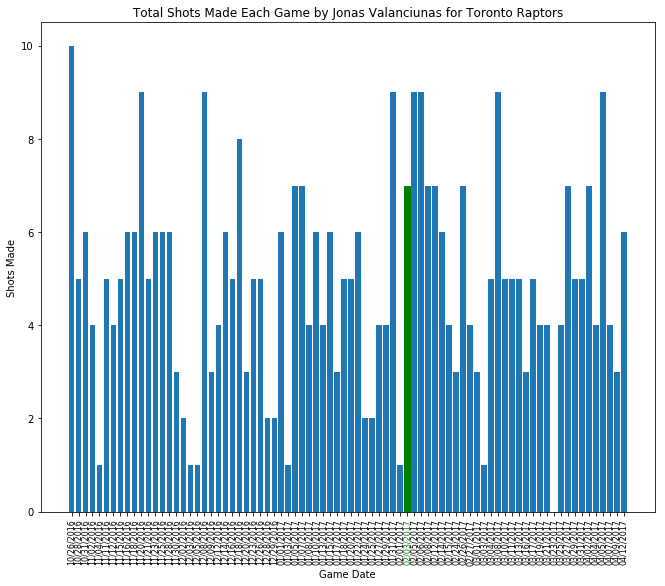

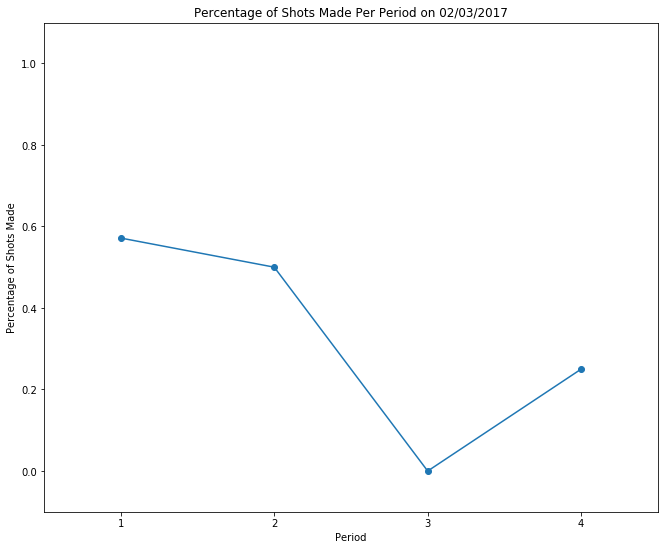

In [21]:
%matplotlib inline
fetch_button = Button(description='Get Data!', icon='check')
display(team_menu, plyr_menu, game_menu, fetch_button)

def get_visuals(change):
    clear_output()
    display(team_menu, plyr_menu, game_menu, fetch_button)
    
    teamid = str(team_menu.value)
    playerid = str(plyr_menu.value)
    gameid = str(game_menu.value)
    
    # getting data set up for plot of total 
    # shots each game for chosen player
    player_shots = h.get_nba_data('shotchartdetail', choose_player_game(teamid, playerid))
    player_shots_dd = dict()
    for d, s in player_shots.groupby('GAME_DATE'):
        player_shots_dd[d] = sum(s.SHOT_MADE_FLAG)
    
    player_shots_df = pd.DataFrame({
                        'game_date': list(player_shots_dd.keys()),
                        'shots_made': list(player_shots_dd.values()),
                      })
    
    # getting game date (from value) to color later
    gameid_index = list(player_shots['GAME_ID']).index(gameid)
    match_date = list(player_shots['GAME_DATE'])[gameid_index]
    date_location = list(player_shots_df.game_date).index(match_date)
    
    # getting prettier dates
    temp = player_shots_df.game_date.copy()
    for i in range(len(temp)):
        read_date = readable_date(temp[i])
        temp[i] = read_date
    player_shots_df['game_date'] = temp
    
    # plotting total shots each game for chosen player
    figsize(11, 9)
    objects = player_shots_df['game_date']
    y_pos = np.arange(len(objects))
    shots_plot = plt.bar(y_pos, player_shots_df['shots_made'], align = 'center')
    plt.xticks(y_pos, objects, rotation=90, fontsize=8);
    
    plt.xlabel("Game Date")
    plt.ylabel("Shots Made")
    plt.title("Total Shots Made Each Game by " + str(list(player_shots['PLAYER_NAME'])[0]) 
              + " for " + str(list(player_shots['TEAM_NAME'])[0]))
    
    # coloring specific date bar and label
    shots_plot.get_children()[date_location].set_color('g') 
    plt.gca().get_xticklabels()[date_location].set_color('g')
    
    plt.show() # to show both graphs
    
    # getting data set up for percentage of shots
    # made in each period for chosen game    
    period_percentage = h.get_nba_data('shotchartdetail', choose_player_game(teamid, playerid, gameid))
    period_percentage_dd = dict()
    for p, s in period_percentage.groupby('PERIOD'):
        period_percentage_dd[p] = sum(s.SHOT_MADE_FLAG) / sum(s.SHOT_ATTEMPTED_FLAG)
    
    period_percentage_df = pd.DataFrame({
                        'period': sorted(list(period_percentage_dd.keys())),
                        'percentage_made': list(period_percentage_dd.values()),    
                      })
    
    # plotting percentage of shots made in each period for chosen game
    plt.plot((period_percentage_df['period']), period_percentage_df['percentage_made'], '-o')
    plt.xlabel("Period")
    plt.ylabel("Percentage of Shots Made")
    plt.title("Percentage of Shots Made Per Period on " + str(readable_date(match_date)))
    
    ticks=[1,2,3,4]
    ot = [] # for overtime periods
    quarters = list(period_percentage.PERIOD.unique()) # quarters where shots were taken
    for i in quarters: # getting possible overtime periods
        if i > 4:
            ot.append(i)
    if len(ot) != 0:
        ticks += ot
    
    plt.xticks(ticks)
    plt.xlim((0.5,ticks[-1] + 0.5))
    plt.ylim((-0.1,1.1))
    
player_shots = fetch_button.on_click(get_visuals)